# Correlation and Autocorrelation

In [9]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

## 1. A "Thin" Application of Time Series

Google Trends allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet", which is pre-loaded in a DataFrame called diet. A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

<Axes: xlabel='Month'>

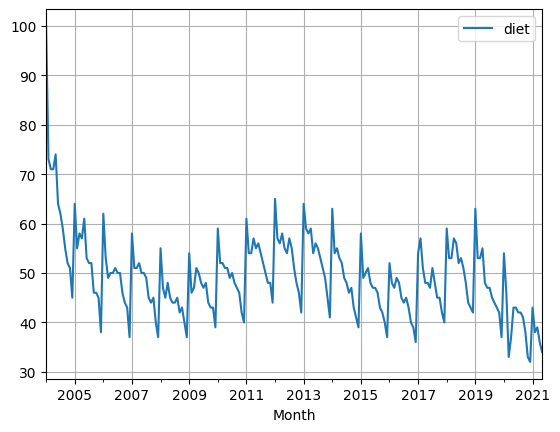

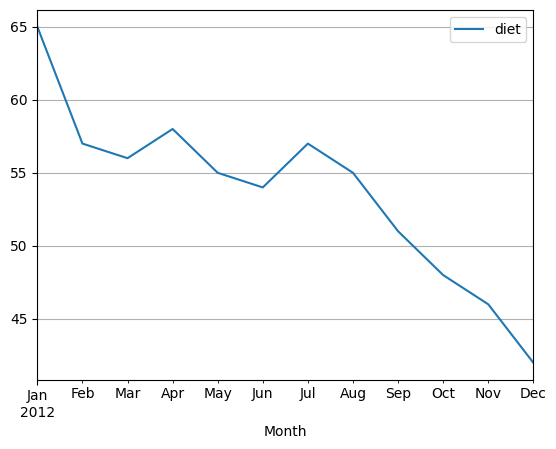

In [30]:
# import data
diet = pd.read_csv("../data/GoogleSearch.csv")

# Convert the string date index to datetime
diet.set_index('Month', inplace=True)
diet.index = pd.to_datetime(diet.index)

# Plot the entire time series diet and show gridlines
diet.plot(grid=True)

# Slice the diet dataset to keep only values from 2012, assigning to diet2012.
diet2012 = diet.loc['2012']
# Plot the diet2012, again creating gridlines with the grid argument.
diet2012.plot(grid = True)

## 2. Merging Time Series With Different Dates

Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

{'1950-01-01', '1948-08-01', '1929-02-01', '1941-08-01', '1947-02-01', '1935-05-01', '1940-04-01', '1954-01-01', '1932-10-01', '1923-01-01', '1929-05-01', '1917-12-01', '1941-06-01', '1951-02-01', '1919-06-01', '1927-03-01', '1921-10-01', '1933-11-01', '1937-07-01', '1955-08-01', '1939-11-01', '1917-06-01', '1915-09-01', '1945-07-01', '1922-05-01', '1925-12-01', '1928-01-01', '1959-08-01', '1956-05-01', '1927-11-01', '1915-02-01', '1955-06-01', '1935-07-01', '1951-03-01', '1947-09-01', '1937-11-01', '1943-02-01', '1959-04-01', '1946-06-01', '1948-10-01', '1920-08-01', '1928-12-01', '1936-05-01', '1936-09-01', '1918-09-01', '1939-07-01', '1930-07-01', '1959-03-01', '1945-09-01', '1949-06-01', '1952-03-01', '1955-05-01', '1958-04-01', '1917-08-01', '1933-04-01', '1914-12-01', '1920-09-01', '1946-02-01', '1950-02-01', '1956-04-01', '1925-11-01', '1949-10-01', '1937-09-01', '1942-05-01', '1923-12-01', '1926-12-01', '1954-06-01', '1938-07-01', '1935-04-01', '1938-05-01', '1933-03-01', '1928

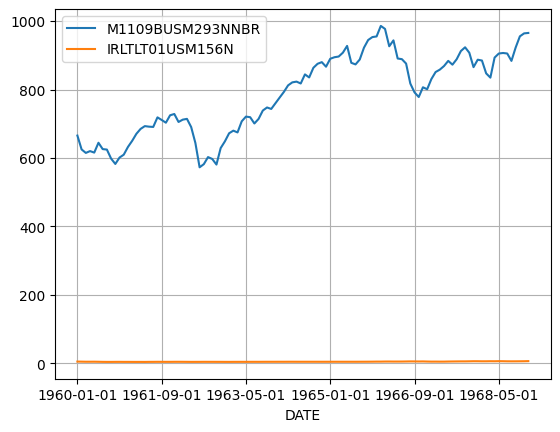

In [40]:
# load Bond and Stock data file in two data frame

stocks = pd.read_csv('../data/stockprice.csv')
# print(stocks.head())
bonds = pd.read_csv('../data/10yrBond.csv')
# print(bonds.head())

# set DATE columns as index for both the dataframe
stocks.set_index('DATE', inplace=True)
bonds.set_index('DATE', inplace=True)

# Convert the dates in the stocks.index and bonds.index into sets.
set_stock_index = set(stocks.index)
set_bond_index = set(bonds.index)

# Take the difference of the stock set minus the bond set to get those dates where the stock market has data but the bond market does not.
print(set_stock_index - set_bond_index)

# Merge the two DataFrames into a new DataFrame, stocks_and_bonds
stocks_and_bonds = stocks.join(bonds, how="inner")

# plot the graph
stocks_and_bonds.plot(grid=True)
plt.show()


## 3. Corelation of two time series